# Como usar o `GridSearchCV`
***

### 1. Índice
- [2. Importação dos _Packages_](#2)
- [3. _Datasets_](#3)
- [4. _Classifiers_](#4)
- [5. Análise dos Resultados](#5)
- [6. _Cross Validation_](#6)
- [7. _Scoring_](#7)
- [8. Conclusões](#8)

***


### 2. Importação dos _Packages_ básicos  <a id='2'></a>

In [1]:
# Importação dos packages básicos.
from sklearn import datasets
import pandas as pd
import numpy as np

# Só para evitar a aparição dos warnings.
import warnings
warnings.filterwarnings('ignore')

### 3. _Dataset_ <a id='3'></a>

Será usado como exemplo de dataset para a aplicação do `GridSearchCV` o banco de dados de câncer de mama.

In [2]:
# Carregando os dados de Câncer de mama.
cancer = datasets.load_breast_cancer()

O objeto `cancer` será um dicionário, dessa maneira vamos apenas carregar os dados que nos interessam.

In [3]:
# Criação do dataset features e vetor labels.
features = cancer.data
labels = cancer.target

### 4. _Classifier_ <a id='4'></a>

Esse exemplo terá como base a calibragem dos parâmetros do `AdaBoost`.

In [4]:
# Importação GridSearchCV.
from sklearn.model_selection import GridSearchCV

# Importação do AdaBoost.
from sklearn.ensemble import AdaBoostClassifier

Vamos usar o `constructor` do AdaBoost para criar um objeto chamado `clf`, ora doravante _classifier_.

In [5]:
# Criação do objeto do AdaBoost.
clf = AdaBoostClassifier() # Sem nada dentro, pois vamos "variar" os parâmetros.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

#### Primeira Iteração

Vamos definir quais serão os valores para o `GridSearchCV` testar.

In [6]:
# Parametros do AdaBoost para o GridSearchCV testar.
parametros = {'learning_rate':[0.1, 1,  2],
              'n_estimators' :[  1, 5, 10]}

Já temos toda a parte do _classifier_ pronta, falta criar um objeto do `GridSearchCV`.

In [7]:
# Criação do objeto do GridSearchCV.
grid = GridSearchCV(estimator = clf,          # É o nosso AdaBoost.
                    param_grid = parametros,  # É aquele dicionário com valores para serem testados.
                    scoring = 'f1',           # Arbitrariamente escolhi o f1, adiante explico com detalhes.
                    cv = 20)                  # Idem, arbitratiamente escolhi 10 e adiante será explanado.

Treina-se o objeto `grid` usando **todo** o _dataset_, pois `cv` foi definido como 20.

In [8]:
# Treinando o grid.
grid.fit(features, labels)

GridSearchCV(cv=20, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 1, 2],
                         'n_estimators': [1, 5, 10]},
             scoring='f1')

Por fim, tem-se o resultado de todas as simulações armazenadas em `grid` cujo resultado pode ser acessa pelo atributo `.cv_results_`.

In [9]:
# Imprimindo os resultados.
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006178,0.000904,0.001938,0.000389,0.1,1,"{'learning_rate': 0.1, 'n_estimators': 1}",0.900000,0.947368,0.875000,...,0.882353,0.944444,0.918919,0.914286,0.909091,0.947368,0.972973,0.910787,0.037332,6
1,0.025473,0.001810,0.002833,0.000307,0.1,5,"{'learning_rate': 0.1, 'n_estimators': 5}",0.923077,0.972973,0.941176,...,0.944444,1.000000,0.947368,0.914286,0.944444,0.947368,0.972973,0.935509,0.044272,4
2,0.050993,0.001878,0.004108,0.000534,0.1,10,"{'learning_rate': 0.1, 'n_estimators': 10}",0.947368,0.944444,0.941176,...,0.944444,0.972973,0.947368,0.914286,1.000000,0.972973,0.972973,0.947250,0.041381,3
3,0.005604,0.000485,0.001858,0.000335,1,1,"{'learning_rate': 1, 'n_estimators': 1}",0.900000,0.947368,0.875000,...,0.882353,0.944444,0.918919,0.914286,0.909091,0.947368,0.972973,0.910787,0.037332,6
4,0.024831,0.002193,0.002682,0.000347,1,5,"{'learning_rate': 1, 'n_estimators': 5}",1.000000,0.971429,0.941176,...,0.914286,1.000000,0.944444,0.971429,0.914286,0.971429,1.000000,0.962110,0.028488,2
5,0.048020,0.004512,0.003876,0.000690,1,10,"{'learning_rate': 1, 'n_estimators': 10}",1.000000,0.941176,1.000000,...,0.944444,0.971429,0.918919,0.971429,0.972973,1.000000,0.972973,0.962354,0.037609,1
6,0.005271,0.000627,0.001683,0.000168,2,1,"{'learning_rate': 2, 'n_estimators': 1}",0.900000,0.947368,0.875000,...,0.882353,1.000000,0.918919,0.914286,0.812500,0.947368,0.972973,0.908735,0.047049,8
7,0.025496,0.001200,0.002948,0.000391,2,5,"{'learning_rate': 2, 'n_estimators': 5}",0.923077,0.947368,0.875000,...,0.882353,0.971429,0.888889,0.875000,0.909091,0.888889,0.972973,0.911806,0.037655,5
8,0.046720,0.003743,0.003811,0.000483,2,10,"{'learning_rate': 2, 'n_estimators': 10}",0.000000,0.000000,0.250000,...,0.200000,0.068966,0.074074,0.193548,0.193548,0.068966,0.071429,0.175009,0.258598,9


Note que há muitas colunas o que impossibilita a visualização de todos os dados.

In [10]:
# Visualizar todas as colunas.
pd.DataFrame(grid.cv_results_).columns.tolist()

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_learning_rate',
 'param_n_estimators',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'split10_test_score',
 'split11_test_score',
 'split12_test_score',
 'split13_test_score',
 'split14_test_score',
 'split15_test_score',
 'split16_test_score',
 'split17_test_score',
 'split18_test_score',
 'split19_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

Observe que os "splits" no nome das colunas se referem ao número da simulação, isto é, foram feitas 20 simulações para cada conjunto de parâmetros (que vc pode visualizar na coluna `params`). Ao passo que "train" e "test" referem-se à divisão do _dataset_ em treino e test, note que o `GridSearchCV` já faz isso automaticamente!! Logo, não há necessidade de dividir o _dataset_ usando o `train_test_split` antes de treinar o seu objeto `grid`, pois quando o parâmetros `cv` é configurado para um número inteiro (neste caso 20) é feito "ocultamente" um `StratifiedKFolds`, conforme pode ser confirmado na documentação do módulo `GridSearchCV`.

$$\text{Total de Simulacoes} = \underbrace{9}_{3 \cdot 3} \cdot \underbrace{20}_{n\_splits} = 360$$



```
cv : int, cross-validation generator or an iterable, optional
Determines the cross-validation splitting strategy. Possible inputs for cv are:

None, to use the default 3-fold cross validation,
integer, to specify the number of folds in a (Stratified)KFold,
CV splitter,
An iterable yielding (train, test) splits as arrays of indices.
For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

Refer User Guide for the various cross-validation strategies that can be used here.

Changed in version 0.20: cv default value if None will change from 3-fold to 5-fold in v0.22.
```

O significado de `score` nos nomes das colunas se referem ao **score** definido na criação do seu objeto `grid`, este exemplo usou o `f1`. Portanto, todas as colunas possuem o valor da métrica `f1` daquela simulação.

Vamos adiante para descobrir quais são os parâmetros que produzem os melhores resultados. Para isso, vamos imprimir o melhor `score`, que é o `f1` neste caso.

In [11]:
# Imprimindo o score.
grid.best_score_

0.9623544552956316

Sabemos o resultado dos melhores parâmetros, mas não sabemos quais são esses valores.

In [12]:
# Imprime os parâmetros que produziram o ".best_score_".
grid.best_params_

{'learning_rate': 1, 'n_estimators': 10}

Caso você queira visualizar os resultados dos outros parâmetros, você pode imprimir os resultados e fazer um _subset_. Neste exemplo abaixo selecionei somente `params`, `rank_test_score` e `mean_test_score`.

In [13]:
# Imprime colunas selecionadas.
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']]

,params,rank_test_score,mean_test_score
0,"{'learning_rate': 0.1, 'n_estimators': 1}",6,0.910787
1,"{'learning_rate': 0.1, 'n_estimators': 5}",4,0.935509
2,"{'learning_rate': 0.1, 'n_estimators': 10}",3,0.947250
3,"{'learning_rate': 1, 'n_estimators': 1}",6,0.910787
4,"{'learning_rate': 1, 'n_estimators': 5}",2,0.962110
5,"{'learning_rate': 1, 'n_estimators': 10}",1,0.962354
6,"{'learning_rate': 2, 'n_estimators': 1}",8,0.908735
7,"{'learning_rate': 2, 'n_estimators': 5}",5,0.911806
8,"{'learning_rate': 2, 'n_estimators': 10}",9,0.175009


#### Segunda Iteração

Observe que o processo de _tuning_ não consiste apenas em uma simulação do `GridSearchCV`, isso deve ser repetido algumas vezes até se chegar na convergência dos parâmetros. O próximo passo seria a simulação com os parâmetros ajustados, tendo diminuído a distância entre os extremos.

In [14]:
# Novos parametros do AdaBoost para o GridSearchCV testar.
parametros = {'learning_rate':[0.5, 1, 1.5],  # Antes era [0.1, 1,  2].
              'n_estimators' :[  3, 5,   7]}  # Antes era [  1, 5, 10].

O próximo passo é treinar e visualizar novamente os melhores parâmetros. Infelizmente, teremos que criar novamente o objeto `grid`, uma vez que o atual já está treinado.

In [15]:
# Criação do objeto do GridSearchCV com parametros ajustados.
grid = GridSearchCV(estimator = clf,          # É o nosso AdaBoost.
                    param_grid = parametros,  # É aquele dicionário com valores para serem testados.
                    scoring = 'f1',           # Arbitrariamente escolhi o f1, adiante explico com detalhes.
                    cv = 20)                  # Idem, arbitratiamente escolhi 20 e adiante será explanado.

# Vamos treinar e imprimir os melhores parâmetros.
grid.fit(features,labels).best_params_

{'learning_rate': 1, 'n_estimators': 3}

Observe que houve uma alteração do `n_estimators`, o que corrobora com a ideia de ajuste do processo de _tuning_. Vamos imprimir o `score`.

In [16]:
# Novo valor de f1.
grid.best_score_

0.9665504181758052

### 5. Análise dos Resultados <a id='5'></a>

Saliento que o intervalo entre um parâmetro e outro é "grande" propositalmente para buscar o melhor parâmetro no maior espectro possível de valores. Note que usar estratégias com inúmeros parâmetros (e muito próximos) não são computacionalmente eficientes, pois você aumentará demasiadamente o tempo de execução do seu modelo.

Exemplo de um dicionário de parâmetros computacionalmente pouco eficiente.

In [17]:
# Dicionário de parâmetros pouco eficiente.
parametros_2 = {'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                'n_estimators' :[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10]}

Serão feitos 2000 simulações, hipoteticamente cada simulação demore em média 1 minuto, totalizará 2000 minutos o que é aproximadamente 32.6 horas.

$$\text{Total de Simulacoes} = \underbrace{100}_{10 \cdot 10} \cdot \underbrace{20}_{n\_splits} = 2000$$



Note que usando esses _toys datasets_ as simulações são rápidas, mas no mundo real elas demoram. Portanto, é bom cultivar as boas práticas. A estratégia mais simples para otimizar os parâmetros é implementar a [_Divide-and-conquer algorithm_][divide_wiki] e isso foi feito inconscientemente ao realizar essas duas iterações.

[divide_wiki]: https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm

Por fim, caso seja necessário a criação de um _classifier_ com os melhores parâmetros, você pode usar o `.best_estimator_`.

In [18]:
# Criando um objeto que os melhores parametros.
clf_otimizado = grid.best_estimator_

# Visualizar o objeto para conferir os parametros.
clf_otimizado

AdaBoostClassifier(learning_rate=1, n_estimators=3)

### 6. _Cross Validation_ <a id='6'></a>

>O que é Cross Validation?

É o uso de um _dataset_ independente para avaliar o grau de generalização do seu modelo.

Ressalto que esse **Jupyter Notebook** não tem a finalidade de discorrer sobre esse específico assunto, logo tomo como pressuposto que o leitor saiba exatamente o que é o _cross validation_ e os módulos envolvidos para realizá-lo.

Observe que o `cross_validation` é feito ao configurar o parâmetro `cv` do `GridSearchCV`. Quando o cv é um número, entende-se que será feito um `StratifiedKFolds`, ao passo que se for atribuído ao `cv` um objeto do tipo `StratifiedShuffleSplit` ele usará esse objeto para realizar o `cross_validation`.

Por último, se o `cv` for omitido na criação do objeto, o `GridSearchCV` entenderá que você fará por conta própria o _cross validation_, isso é o que ele chama de _third party_ _cross validation_.


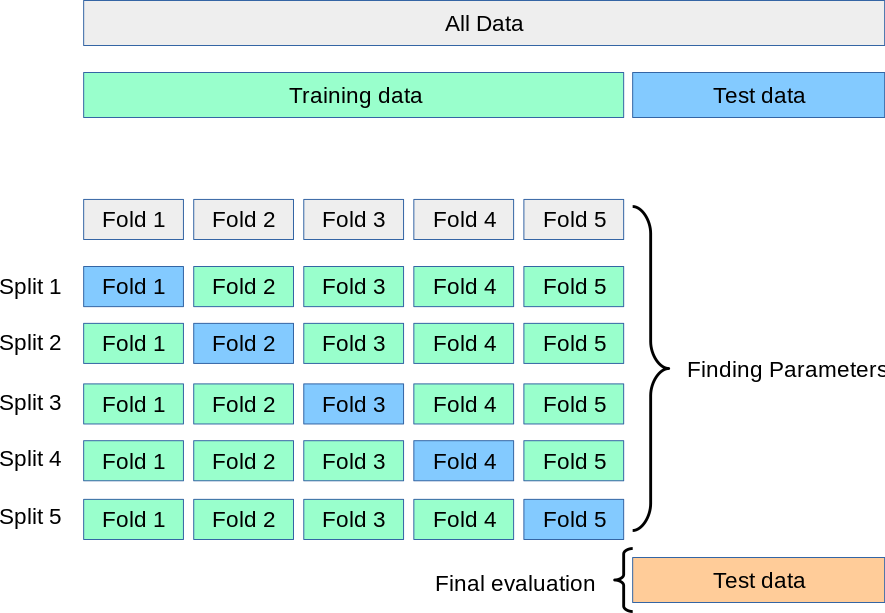

**Exemplo usando o StratifiedKFolds**

In [19]:
# Exemplo para o uso do StratifiedKFolds com 5 folds.
grid_2 = GridSearchCV(estimator = clf,
                      param_grid = parametros,
                      cv = 5,
                      scoring = 'f1')

# Imprime o f1
grid_2.fit(features,labels).best_score_

0.956716255030887

**Exemplo usando o StratifiedShuffleSplit**

In [20]:
# Exemplo para o uso do StratifiedShuffleSplit.

# Importação do módulo do StratifiedShuffleSplit.
from sklearn.model_selection import StratifiedShuffleSplit

# Usando o constructor para criar o objeto sss
sss = StratifiedShuffleSplit(n_splits = 20,       # 20 simulações.
                             test_size = 0.2,     # 20% do dataset será de testes.
                             random_state = 42)   # Permitir a reprodutibilidade.

# Criando um objeto do GridSearchCV
grid_3 = GridSearchCV(estimator = clf,
                      param_grid = parametros,
                      cv = sss,
                      scoring = 'f1')

# Imprime o f1
grid_3.fit(features,labels).best_score_

0.9588736081181907

**Exemplo omitindo cv**

In [21]:
# Exemplo omitindo o cv.

# Criando um objeto do GridSearchCV sem cv.
grid_4 = GridSearchCV(estimator = clf,
                      param_grid = parametros,
                      scoring = 'f1')

# Imprime o f1
grid_4.fit(features,labels).best_score_

0.956716255030887

Note que neste último caso estou cometendo um erro clássico de _overfitting_, pois estou usando todo o meu dataset para avaliar a performance do meu modelo. Desta maneira, deve-se separar o _features_ e o _labels_ em treino e teste antes de realizar o `fit`. Aconselha-se que use o `cv` interno do `GridSearchCV`, pois ele economizará muitas linhas de código.

### 7. _Scoring_ <a id='7'></a>

Essa é a métrica utilizada para avaliar cada conjunto de parâmetros simulados pelo `GridSearchCV`, podem ser:

* _recall_;
* _precision_;
* _accuracy_;
* f1, ou;
* fbeta_score (Obs.: Note que o `f1` é um caso específico do `fbeta_score` quando `beta = 1`.).

Caso você tenha eligido o `f1` como os exemplos anteriores, o objeto do `GridSearchCV` terá somente valores de `f1`, isso pode limitar a avaliação do modelo. Desta maneira, introduz o `make_scorer` que é um módulo do Scikit Learn que possibilita o `GridSearchCV` a calcular várias métricas e as armazenando no objeto do `GridSearchCV`.

In [22]:
# Importando o Make Scorer
from sklearn.metrics import make_scorer

# Importando os módulos de cálculo de métricas
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

# Criando um dicionário com as métricas que desejo calcular.
meus_scores = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(fbeta_score, beta = 1)}

# Exemplo para o uso scoring igual ao meus_scores.
grid_5 = GridSearchCV(estimator = clf,
                      param_grid = parametros,
                      cv = 5,
                      scoring = meus_scores,   # É o meus_scores
                      refit = 'f1')            # Observe que foi configurado para f1

# Imprime o f1
grid_5.fit(features,labels).best_score_

0.9594559810582843

Vamos analisar o atributo `.cv_results_` para verificar se houve a adição das colunas com os valores de `recall`, `precision` e `f1`.

In [23]:
# Imprime todas as colunas.
pd.DataFrame(grid_5.cv_results_).columns.tolist()

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_learning_rate',
 'param_n_estimators',
 'params',
 'split0_test_accuracy',
 'split1_test_accuracy',
 'split2_test_accuracy',
 'split3_test_accuracy',
 'split4_test_accuracy',
 'mean_test_accuracy',
 'std_test_accuracy',
 'rank_test_accuracy',
 'split0_test_recall',
 'split1_test_recall',
 'split2_test_recall',
 'split3_test_recall',
 'split4_test_recall',
 'mean_test_recall',
 'std_test_recall',
 'rank_test_recall',
 'split0_test_precision',
 'split1_test_precision',
 'split2_test_precision',
 'split3_test_precision',
 'split4_test_precision',
 'mean_test_precision',
 'std_test_precision',
 'rank_test_precision',
 'split0_test_f1',
 'split1_test_f1',
 'split2_test_f1',
 'split3_test_f1',
 'split4_test_f1',
 'mean_test_f1',
 'std_test_f1',
 'rank_test_f1']

Conforme esperado, agora o objeto `grid` possui todas as métricas desejadas para uma análise detalhada. Abaixo faço um _subset_ para imprimir somente as colunas que são as médias dos _splits_. Note que foi escolhido a impressão dos resultados do _test_ para não incorrermos em _overfitting_.

In [24]:
# Fazendo uma subamostragem. 
pd.DataFrame(grid_5.cv_results_)[['params', 'mean_test_recall', 'mean_test_precision', 'mean_test_f1']]

,params,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'learning_rate': 0.5, 'n_estimators': 3}",0.949531,0.931589,0.940392
1,"{'learning_rate': 0.5, 'n_estimators': 5}",0.960759,0.950388,0.955409
2,"{'learning_rate': 0.5, 'n_estimators': 7}",0.963537,0.956070,0.959456
3,"{'learning_rate': 1, 'n_estimators': 3}",0.971987,0.920543,0.944544
4,"{'learning_rate': 1, 'n_estimators': 5}",0.938341,0.944599,0.941014
5,"{'learning_rate': 1, 'n_estimators': 7}",0.949452,0.950085,0.949430
6,"{'learning_rate': 1.5, 'n_estimators': 3}",0.929969,0.904937,0.915818
7,"{'learning_rate': 1.5, 'n_estimators': 5}",0.943975,0.949929,0.946592
8,"{'learning_rate': 1.5, 'n_estimators': 7}",0.963615,0.927735,0.944213


Note que para um computador é muito difícil a tarefa de escolha de um dos conjuntos de parâmetros sem que seja definido qual é a estratégia de escolha. Dessa maneira, define-se o `refit` para que o `GridSearchCV` possa eligir a melhor solução quando solicitado. No caso do exemplo acima foi definido `f1`, logo a solução de melhor `f1` é a `{'learning_rate': 0.5, 'n_estimators': 7}`.

Caso seja necessário a impressão de várias métricas de um mesmo conjunto de parâmetros, pode-se usar uma _query_ para selecionar um conjunto de parâmetros. O exemplo abaixo seleciona-se o conjunto com o maior valor de `f1` e imprime os valores de `recall`, `precision` e `f1`.

In [25]:
# Filtrando os resultados para imprimir os parâmetros que possuem os melhores.
pd.DataFrame(grid_5.cv_results_)[['params',
                                  'mean_test_recall',
                                  'mean_test_precision',
                                  'mean_test_f1']].query('mean_test_f1 == mean_test_f1.max()')

,params,mean_test_recall,mean_test_precision,mean_test_f1
2,"{'learning_rate': 0.5, 'n_estimators': 7}",0.963537,0.95607,0.959456


Com a definição de `refit` pode-se usar o `.best_params_`.

In [26]:
# Imprime os melhores parâmetros.
grid_5.best_params_

{'learning_rate': 0.5, 'n_estimators': 7}

Ressalto que o atributo `.best_params_` **somente** existirá se o `refit` for definido.

### 8. Conclusões <a id='8'></a>

Foram abordados quase todos os parâmetros do `GridSearchCV` e muito deles com exemplos. Foi possível observar que o `GridSearchCV` automatiza grande parte do processo de _tuning_, bem como possui um processo de _cross validation_ interno que é muito prático.

## Referências

#### Tags

* Autor: AH Uyekita
* Data: 2019/03/22
* Post: [Como usar o `GridSearchCV`][post_url]

[post_url]: https://andersonuyekita.github.io/notebooks/blog/como-usar-o-gridsearchcv/

#### Descrição

Esse é um arquivo de acompanhamento do _post_ de mesmo nome.
